In [181]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.graphics.api as smg
import seaborn as sns
from scipy import stats
# loading the training dataset 
df = pd.read_csv('data_housing_price.csv', index_col = 0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


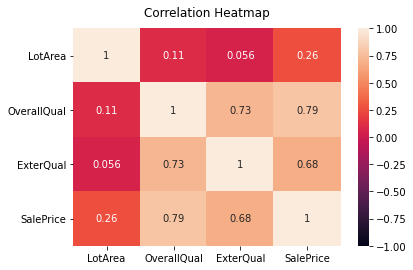

In [182]:
# correlation analysis
# integer encoding
df['ExterQual']=df['ExterQual'].replace(df['ExterQual'].values[341], 0) # Ex
df['ExterQual']=df['ExterQual'].replace(df['ExterQual'].values[1], 1)   # Gd
df['ExterQual']=df['ExterQual'].replace(df['ExterQual'].values[0], 2)   # TA
df['ExterQual']=df['ExterQual'].replace(df['ExterQual'].values[11], 3)  # Fa
df['ExterQual']=pd.to_numeric(df['ExterQual'], downcast='integer')

corr_matrix=df[['LotArea','OverallQual','ExterQual','SalePrice']].corr()
heatmap=sns.heatmap(df[['LotArea','OverallQual','ExterQual','SalePrice']].corr(),vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [183]:
# spearman correlation
spear_corr_matrix=stats.spearmanr(df['ExterQual'],df['SalePrice'])
print("correlation = %f" %(spear_corr_matrix.correlation))

correlation = 0.684014


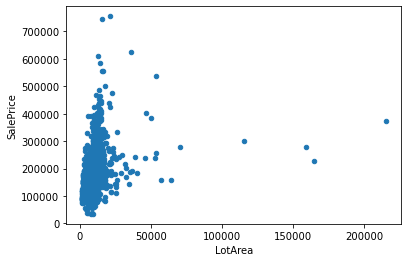

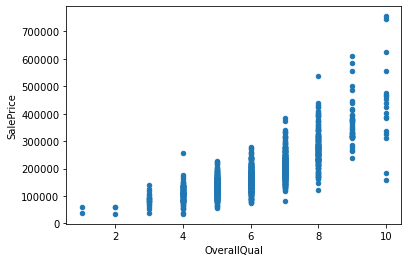

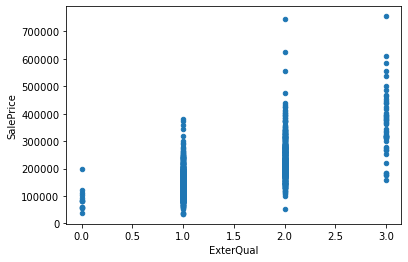

In [184]:
# scatter plot
ax=df.plot.scatter('LotArea', 'SalePrice')
ax=df.plot.scatter('OverallQual', 'SalePrice')
ax=df.plot.scatter('ExterQual', 'SalePrice')
# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# Po	Poor

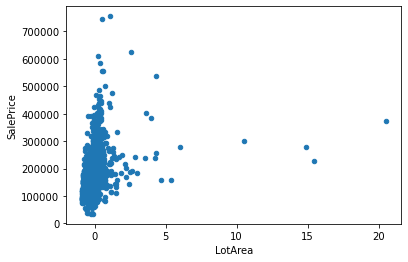

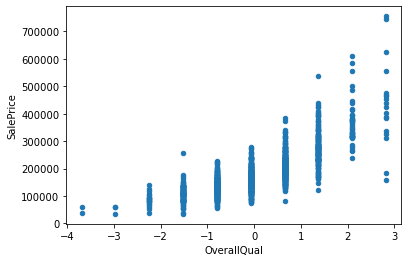

In [185]:
# z standardization
df[['LotArea','OverallQual']]=stats.zscore(df[['LotArea','OverallQual']])
ax=df.plot.scatter('LotArea', 'SalePrice')
ax=df.plot.scatter('OverallQual', 'SalePrice')

In [186]:
# LASSO for variable selection
import statsmodels.api as sm_api
model = sm_api.OLS.from_formula("SalePrice ~ LotArea + OverallQual+C(ExterQual)", data=df)
LASSO_result = model.fit_regularized(alpha=0.01, L1_wt=1) # alpha is weight of regularization term
print(LASSO_result.params)

ypred = LASSO_result.predict(df[['LotArea','OverallQual','ExterQual']])
SSE=((df['SalePrice'] - ypred) ** 2).sum();
SST=((df['SalePrice'] - df['SalePrice'].mean()) ** 2).sum();
p=3;
rsquared_adj=1-((SSE*(row-1))/(SST*(row-p-1)))
print("adjusted R2 = %f" %(rsquared_adj))

Intercept            176282.996866
C(ExterQual)[T.1]     -7456.668119
C(ExterQual)[T.2]     18315.315395
C(ExterQual)[T.3]     89628.824154
LotArea               14496.131098
OverallQual           47824.721296
dtype: float64
adjusted R2 = 0.694342


In [187]:
result = sm.ols(formula='SalePrice ~ LotArea + OverallQual+C(ExterQual)', data=df).fit() 
print(result.summary())
print('MSE = %f' %(result.mse_model))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     662.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:31:32   Log-Likelihood:                -17677.
No. Observations:                1460   AIC:                         3.537e+04
Df Residuals:                    1454   BIC:                         3.540e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.709e+05   1.21e+0